In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import numpy as np

from hubble_focus import focusmodel

In [2]:
def quick_plot(times, data1, data2, label1, label2, title):
    fig, ax = plt.subplots(1, 1, figsize = (5, 3))
    ax.plot(times, data1, label = label1)
    ax.plot(times, data2, label = label2)

    ax.hlines(0, times[0], times[-1], linestyles = '--', lw = 1., zorder = 10)
    ax.set_xlim(times[0], times[-1])

    ax.legend()
    ax.set_xlabel('MJD')
    ax.set_ylabel('Defocus')
    ax.set_title(title)
    
    return fig, ax

(<matplotlib.figure.Figure at 0x110e5f748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x104438550>)

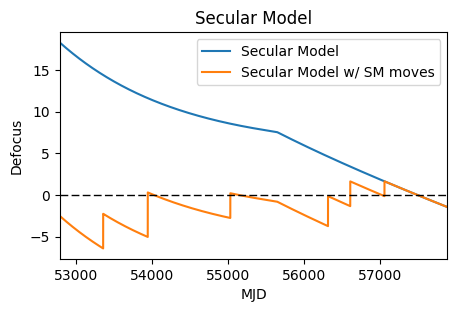

In [3]:
t2003 = focusmodel.to_julian(2003,6,1)
tpresent = focusmodel.to_julian(2017,5,10)
times = np.linspace(t2003 ,tpresent, num=10000)

secular = focusmodel.fullmodel(times, model_type = 'secular', add_sm_steps = False)
secular_with_steps = focusmodel.fullmodel(times, model_type = 'secular', add_sm_steps = True)

quick_plot(times, secular, secular_with_steps,
           'Secular Model', 'Secular Model w/ SM moves',
           'Secular Model')

By default, `focusmodel.fullmodel` looks for the thermal telemetry at `/grp/hst/OTA/thermal`. Reading from central store can be slow, so I recommend copying all files matching `/grp/hst/OTA/thermal/thermalData*.dat` to a local directory. In the examples below, I've copied these to the current working directory and set `thermal_path` accordingly.

(<matplotlib.figure.Figure at 0x101e169e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110e9d5f8>)

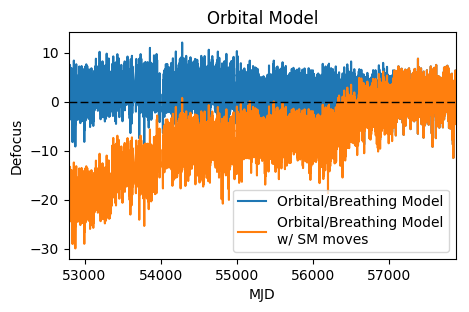

In [4]:
orbital = focusmodel.fullmodel(times, model_type = 'orbital', add_sm_steps = False, thermal_path = '.')
orbital_with_steps = focusmodel.fullmodel(times, model_type = 'orbital', add_sm_steps = True, thermal_path = '.')

quick_plot(times, orbital, orbital_with_steps,
           'Orbital/Breathing Model',
           'Orbital/Breathing Model\nw/ SM moves',
           'Orbital Model')

(<matplotlib.figure.Figure at 0x10b1e2c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110f705f8>)

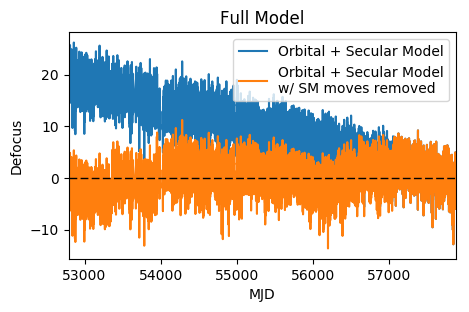

In [5]:
full = focusmodel.fullmodel(times, model_type = 'full', add_sm_steps = False, thermal_path = '.')
full_with_steps = focusmodel.fullmodel(times, model_type = 'full', add_sm_steps = True, thermal_path = '.')

quick_plot(times, full, full_with_steps,
           'Orbital + Secular Model',
           'Orbital + Secular Model\nw/ SM moves removed',
           'Full Model')